In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import h5py
# import healpy as hp
import pykdgrav3_utils
from pykdgrav3_utils import units
un = units.units(1, 600., verbose=True)
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from matplotlib.projections.geo import GeoAxes

sys.path.append('/home/dnurme/linux_env/Thesis/My_thesis/Modules/')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder, rz, ry, rx
from misc import plot_OD_gaussian

dMsolUnit = 1.000000e+00
dKpcUnit = 6.000000e+02
dGasConst =  1150890.1952769116
dErgPerGmUnit =  71.68174956254887
dGmPerCcUnit =  3.1333829769061664e-40
dSecUnit =  2.1867420491060357e+23
dKmPerSecUnit =  8.466507518602276e-05
dComovingGmPerCcUnit =  3.1333829769061664e-40


In [3]:
file = '/home/dnurme/linux_env/Data/pos_stars_Plummer_LMC.npy'
data = np.load(file)
x_plum = data[:,0]
y_plum = data[:,1]
z_plum = data[:,2]

star_coord = np.array([x_plum, y_plum, z_plum]).T

In [4]:
orbitfile = '/home/dnurme/linux_env/Data/trajlmc.txt'
orbit_full = pd.read_csv(orbitfile, delimiter = ' ')
orbit = orbit_full.loc[np.where(orbit_full['time'] < 0.01)]
d_orbit = np.sqrt(orbit['x']**2 + orbit['y']**2 + orbit['z']**2)
loc70 = np.isclose(d_orbit, 70.0, 0.01)
# 70 - d_orbit[loc70]
v70 = orbit['Vx'][loc70].values[0], orbit['Vy'][loc70].values[0], orbit['Vz'][loc70].values[0]
LMC_70 = np.array([orbit['x'][loc70].values[0], orbit['y'][loc70].values[0], orbit['z'][loc70].values[0]])

LMC_today = np.isclose(orbit['time'], 0.0, 0.001)
LMC_loc_today = np.array([orbit['x'][LMC_today].values[0], orbit['y'][LMC_today].values[0], orbit['z'][LMC_today].values[0]])


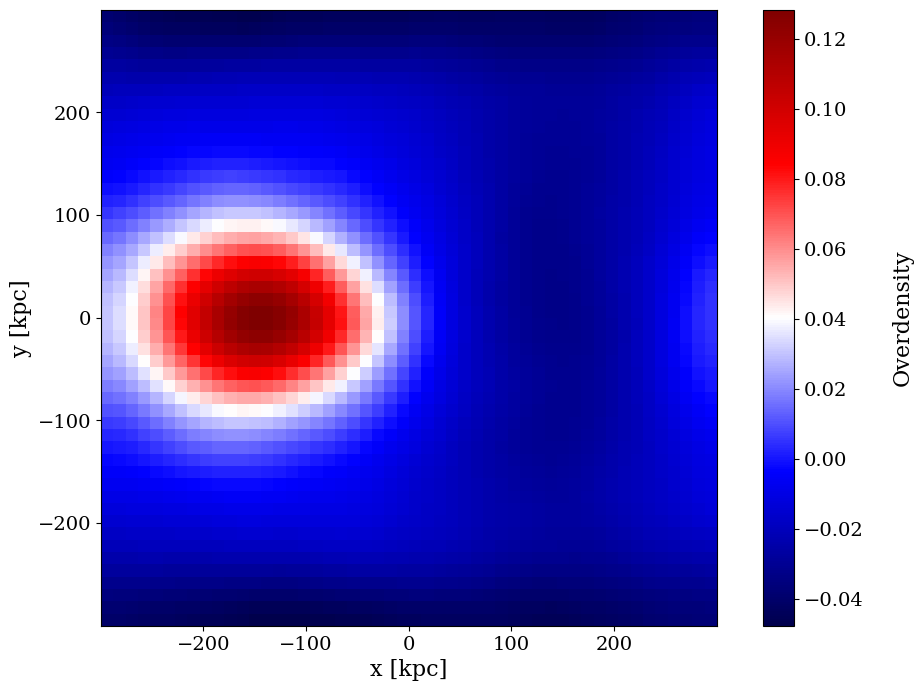

In [5]:
x = star_coord[:,0]
y = star_coord[:,1]

plot_OD_gaussian(x, y, (50, 50), 2,'x [kpc]', 'y [kpc]')


In [34]:
print(int(0.1))

0


In [53]:
mass_LMC = 1.8 * 1e11
r_a = 20.0
r = list(range(0, 100))
r = np.array(r)
sss = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sss = np.array(sss)

In [54]:
plummer_density = (3 * mass_LMC / (4 * np.pi * r_a**3)) * (1 + (r / r_a)**2)**(-5/2)
hernquist_density = (mass_LMC / (2 * np.pi)) * (r_a / (r * (r + r_a)**3))
hern = (mass_LMC / (2 * np.pi)) * (r_a / (sss * (sss + r_a)**3))

/tmp/ipykernel_1744/898409303.py:2: RuntimeWarning: divide by zero encountered in divide
  hernquist_density = (mass_LMC / (2 * np.pi)) * (r_a / (r * (r + r_a)**3))


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_1744/2525249823.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.title('LMC density profiles | a = 20 kpc, M$_{LMC}$ = 1.8e11 M$_{\odot}$')


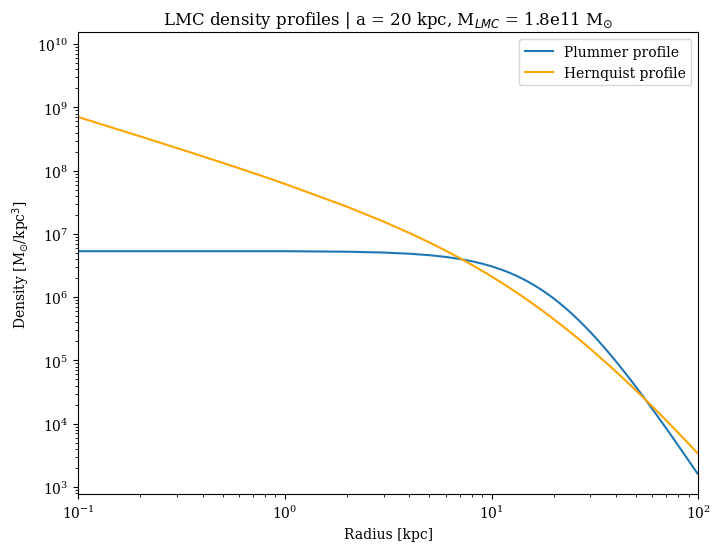

In [56]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.figure(figsize=(8, 6))
plt.plot(r, plummer_density, label='Plummer profile')
plt.plot(r, hernquist_density, label='Hernquist profile', color='orange')
plt.plot(sss, hern, color='orange')
plt.title('LMC density profiles | a = 20 kpc, M$_{LMC}$ = 1.8e11 M$_{\odot}$')
plt.xscale('log')
plt.xlim(0.1, 100)
plt.yscale('log')
plt.ylabel(r'Density [M$_{\odot}$/kpc$^3$]')
plt.xlabel('Radius [kpc]')
plt.legend()

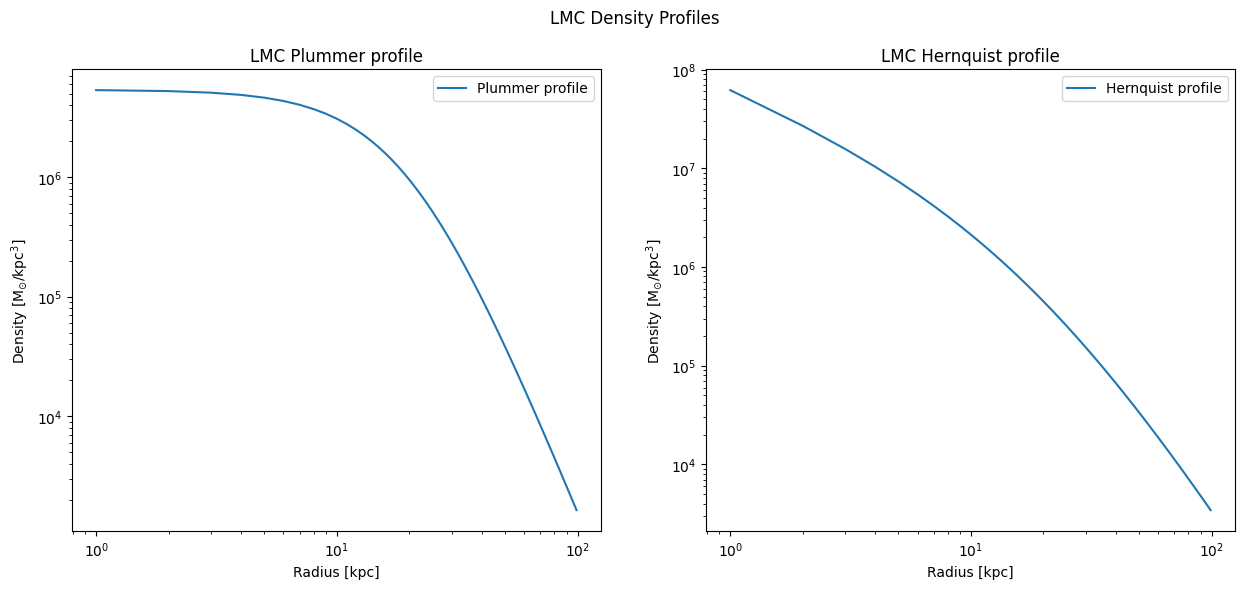

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('LMC Density Profiles')

axs[0].plot(r, plummer_density, label='Plummer profile')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('LMC Plummer profile')
axs[0].set_xlabel('Radius [kpc]')
axs[0].set_ylabel(r'Density [M$_{\odot}$/kpc$^3$]')
axs[0].legend()

axs[1].plot(r, hernquist_density, label='Hernquist profile')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('LMC Hernquist profile')
axs[1].set_xlabel('Radius [kpc]')
axs[1].set_ylabel(r'Density [M$_{\odot}$/kpc$^3$]')
axs[1].legend()